# Single Correlations

Analog to investigate-regression-output but just for a single system and single variable.

In [1]:
# Numerics
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ocn-clim')
import seaborn as sns

# Functions

In [18]:
def load_correlation(VARX, VARY='FG_ALT_CO2', smooth=0, lag=0):
    """
    Loads in the correlations between a predictor (VARX) and the predicted variable
    within the EBUS (VARY, e.g. FG_ALT_CO2). You can designate the smoothing (in years)
    and lag (in months). It automatically filters out any insignificant results.
    """
    filepath = ('/glade/p/work/rbrady/EBUS_BGC_Variability/' +
               'area_weighted_regional_regressions/CalCS/' + VARY + '/' + VARX + '/')
    if smooth == 0:
        filename = (VARX + '.' + VARY + '.CalCS.unsmoothed.area_weighted_regional_regression.'
                    + 'lag' + str(lag) + '.nc')
    else:
        filename = (VARX + '.' + VARY + '.CalCS.smoothed' + str(smooth) +
                    '.area_weighted_regional_regression.lag' + str(lag) + '.nc')
    ds = xr.open_dataset(filepath + filename)
    ds = ds.where(ds.p < 0.05, drop=True)
    df = ds['r'].to_dataframe()
    df['smooth'] = int(smooth/12)
    df['variable'] = VARY
    df['lag'] = lag
    df['index'] = VARX.upper()
    return df

# Visualization: Strip Plot (Compare Indices)

In [40]:
df1 = load_correlation('NPH', VARY='FG_ALT_CO2', smooth=0)
df2 = load_correlation('NPH', VARY='EOF1', smooth=0)
df3 = load_correlation('NPH', VARY='EOF2', smooth=0)

In [41]:
df = pd.concat([df1, df2, df3])

/glade/u/home/rbrady/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/glade/u/home/rbrady/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


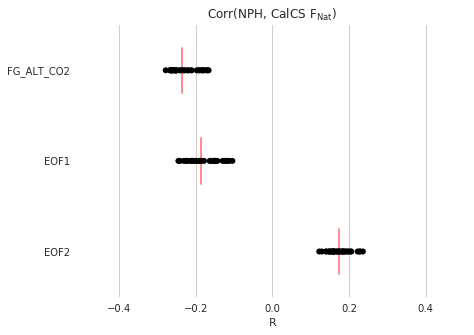

In [43]:
sns.set_style('whitegrid')
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(111)
sns.stripplot(x="r", y="variable", data=df, orient='h',
              color='k', jitter=False, size=6)
sns.despine(left=True, bottom=True)
ax.set(xlim=[-0.51, 0.51], ylabel='', xlabel='R', 
       title='Corr(NPH, CalCS F$_{\mathrm{Nat}}$)')

# Add mean lines.
npgo_mean = df1['r'].median()
plt.plot([npgo_mean, npgo_mean], [-0.25, 0.25], color='r', alpha=0.5)

pdo_mean = df2['r'].median()
plt.plot([pdo_mean, pdo_mean], [0.75, 1.25], color='r', alpha=0.5)

enso_mean = df3['r'].median()
plt.plot([enso_mean, enso_mean], [1.75, 2.25], color='r', alpha=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)

# Visualization: Strip Plot (Compare lags and smoothing)

In [ ]:
df = load_correlation('nino34')
for i in [1,2,3,4,5]:
    df = pd.concat([df, load_correlation('nino34', lag=i)])

#for i in [1,2,3,4,5]:
#    df = pd.concat([df, load_correlation('PDO', lag=i)])
#for s in [12,24,36,48,60]:
#    for i in range(6):
#        df = pd.concat([df, load_correlation('PDO', lag=i, smooth=s)])

In [ ]:
sns.set_style('whitegrid')
f = plt.figure(figsize=(8,4)) 
ax = f.add_subplot(111)
sns.stripplot(x="lag", y="r", color='k',
              data=df, jitter=True)
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
           title="Lag (months)")
ax.set(ylabel='', xlabel='Smoothing (yrs)')
ax.set_title('Corr(PDO, F$_{\mathrm{Nat}}$)', fontsize='x-large')
ax.set_ylim([0,0.75])